# **Causal Analysis of Rain Prediction Using Weather Data**


## Abstract
This notebook explores the causal relationships between weather features and the likelihood of rain the next day (`RainTomorrow`). Using causal inference techniques, including Directed Acyclic Graphs (DAGs), we analyze the effects of variables such as temperature, humidity, and sunshine on rain prediction. The analysis combines theoretical insights, data visualization, and causal modeling to uncover actionable insights for weather forecasting.


# Introduction


Predicting rain accurately is crucial for agriculture, transportation, and disaster management. While traditional models focus on correlations, causal inference provides insights into the direct and indirect effects of weather features on rain.

This notebook uses the weather dataset, which contains features like temperature, humidity, and rainfall, to build a causal model for predicting `RainTomorrow`. By understanding these relationships, we aim to make robust and interpretable predictions.


# Theory: What Is Causality?

Understanding causality is crucial in machine learning, where we aim to make predictions or interventions based on observed data.

Causality is the study of cause-and-effect relationships between variables. It refers to the relationship between cause and effect, where one event (the cause) brings about another event (the effect). Understanding causality is fundamental in various fields, including data science, as it allows us to make informed decisions, predict outcomes, and intervene to achieve desired results.

Unlike correlation, causality ensures that a change in one variable directly influences another.

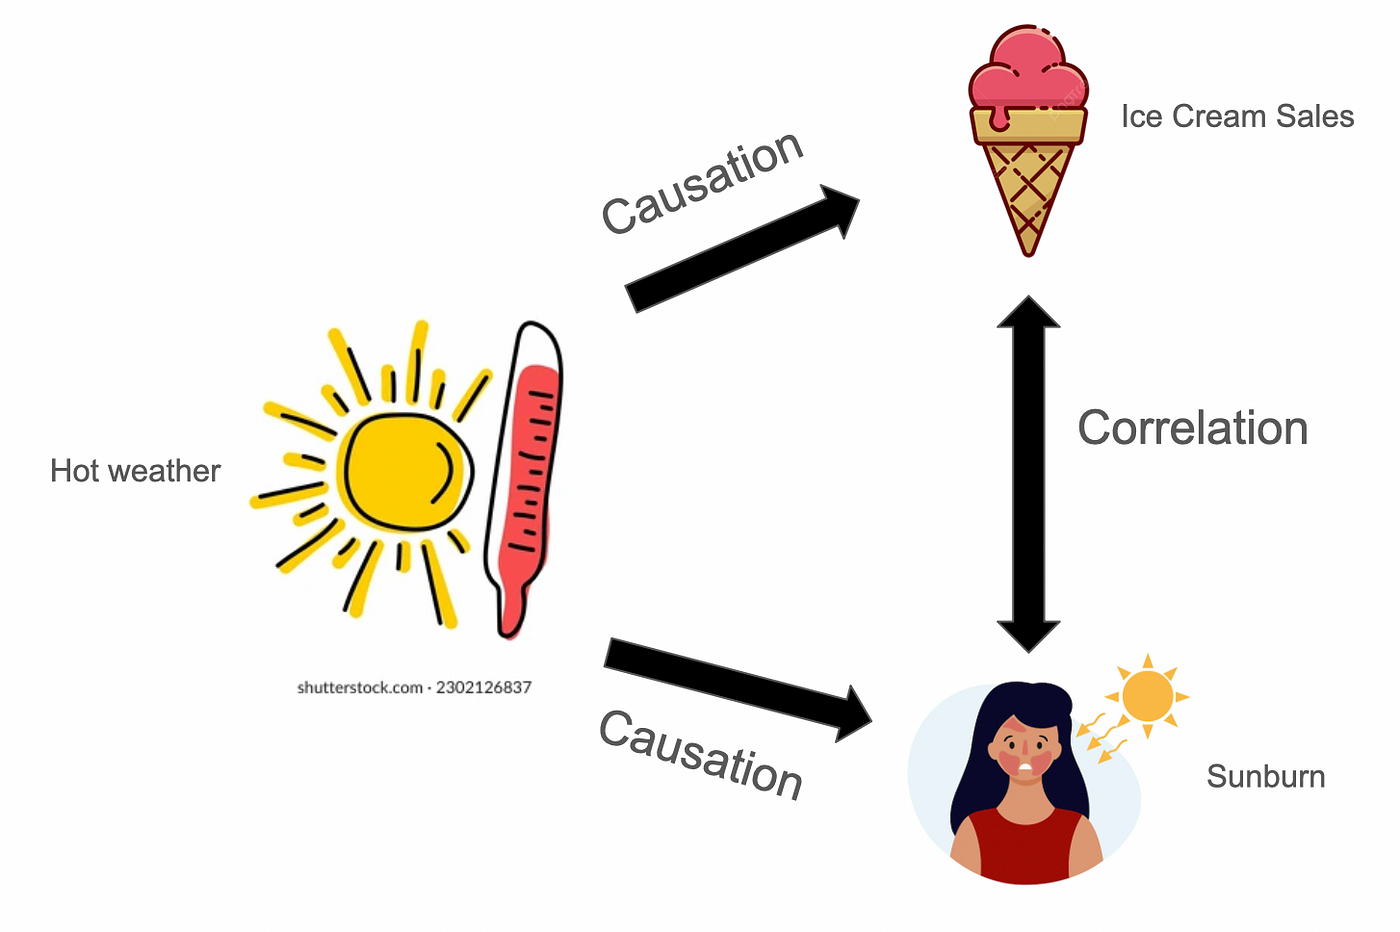

# Key Concepts in Causality

**Correlation vs. Causation**

Correlation: A statistical relationship between two variables where they move together in a predictable pattern. However, correlation alone does not imply that one variable causes the other.

Example: Ice cream sales and drowning incidents might be correlated because both increase during summer, but ice cream does not cause drowning.

Causation: Implies that changes in one variable directly lead to changes in another.

Example: Smoking increases the risk of lung cancer.

**Confounders**: Confounding variables are factors that influence both the cause and the effect, creating spurious correlations.

Example : People who carry lighters are more likely to develop lung cancer, but the confounder is smoking, which causes both carrying lighters and lung cancer.

**Counterfactuals**: Counterfactuals compare the actual outcome with the hypothetical outcome that would have occurred under different conditions.

Example : A student scored well on a test after attending a coaching class; the counterfactual question is: "Would the student have scored as well without attending the coaching class?

**Randomized Controlled Trials (RCTs)**: The gold standard for causal inference, though rarely feasible in weather studies.

RCTs are the gold standard for establishing causality in experimental settings.

In RCTs: Participants are randomly assigned to treatment and control groups.
Randomization ensures that confounders are equally distributed between groups.

**Observational Studies**: Use advanced statistical techniques to infer causality from observed data.

Example: Studying the relationship between smoking and lung cancer by analyzing historical medical records.

# Confounding Variable

A confounding variable is an external variable that influences both the independent variable (cause) and the dependent variable (effect), creating a spurious or misleading association between them. This can lead to incorrect conclusions about the causal relationship between the variables of interest.

**Key Characteristics:**

1. Influences Both Variables: Affects both the independent variable (e.g., treatment or cause) and the dependent variable (e.g., outcome or effect).

2. Distorts Relationships: Creates a false impression of a relationship where none exists, or masks a true relationship.

3. Not Accounted For: If not controlled, it can bias the results of an analysis.

**Example:**

Study: Relationship Between Ice Cream Sales and Drowning

Independent Variable: Ice cream sales.

Dependent Variable: Number of drowning incidents.

Confounding Variable: Temperature.

Here : Hot weather (confounding variable) increases both ice cream sales and swimming activities, which leads to more drownings. Without accounting for temperature, one might falsely conclude that ice cream sales cause drowning.

**Why Are Confounding Variables Important?**

1. Validity of Results: Ignoring confounders can lead to incorrect conclusions about cause-and-effect relationships.

2. Bias Reduction: Identifying and controlling for confounders improves the reliability of findings.

3. Causal Inference: In studies focused on determining causation, addressing confounding is critical to isolate the true effect of the independent variable on the dependent variable.

# Why Machine Learning Needs Causality?

Machine learning fundamentally relies on pattern recognition by leveraging associations and correlations in datasets that are assumed to be independent and identically distributed (i.i.d.). This enables machines to learn from historical data and make predictions about future scenarios. However, this approach has its limitations, especially in dynamic real-world environments where the i.i.d. assumption often breaks down.

# Causality Techniques

Causality techniques are essential for understanding cause-and-effect relationships in data, moving beyond mere correlations to uncover the underlying mechanisms that drive outcomes.

One of the foundational tools in causal analysis is the **Directed Acyclic Graph (DAG)**, which visually represents causal relationships between variables. By identifying causal pathways, confounders, and mediators, DAGs provide a structured framework for hypothesis generation and testing.

Another important method is **Pearl's Do-Calculus**, which enables reasoning about interventions through the "do-operator," allowing researchers to simulate changes in variables and estimate their effects on outcomes.

**Causal discovery algorithms**, such as constraint-based approaches (e.g., PC Algorithm) and score-based methods (e.g., Greedy Equivalence Search), infer causal structures directly from data.

These techniques are complemented by **Propensity Score Matching (PSM)**, which creates comparable groups in observational studies to reduce confounding and estimate treatment effects.

Similarly, **Instrumental Variable (IV)** analysis is employed to address unobserved confounders by leveraging external variables that influence the treatment but not the outcome directly.

**Mediation analysis** decomposes causal effects into direct and indirect components, offering insights into how intermediate variables mediate the relationship between treatment and outcome. Natural experiments and counterfactual analysis further enhance causal understanding by examining hypothetical scenarios or leveraging real-world interventions to estimate causal effects.

**Bayesian networks**, which combine probabilistic modeling with causal inference, provide another powerful framework for decision-making under uncertainty.

Modern frameworks like **DoWhy** integrate these techniques into a unified workflow, simplifying the formulation, estimation, and validation of causal assumptions. These techniques are critical in fields such as healthcare, marketing, public policy, and environmental science, where understanding causality enables robust predictions, reliable interventions, and actionable insights. By leveraging these methods, researchers can move beyond correlation to address real-world problems with greater precision and confidence.

# Applications of Causality in Data Science

1. Healthcare
Understanding the causal effects of treatments or drugs on patient outcomes.
Designing intervention policies to reduce disease prevalence.

2. Marketing
Measuring the impact of advertising campaigns on sales.
Identifying the causal drivers of customer churn and retention.

3. Public Policy
Evaluating the effects of policies, such as minimum wage increases, on employment rates.
Estimating the impact of educational programs on student outcomes.

4. Climate Science
Analyzing the causal relationships between CO2 emissions and global warming.
Designing policies to mitigate environmental damage.

# Objective of the Assignment

The objective of this assignment is to explore causal relationships in the **Weather Dataset**. By analyzing the data and applying causal inference techniques, we aim to identify factors that influence RainTomorrow, assess their causal effects, and draw meaningful insights.

# Importing Library

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
import plotly.express as px
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [155]:
# Loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/Weather.csv')

data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


## **Dataset Description: Weather Dataset for Causal Analysis**

Causal inference helps us understand whether a relationship between variables is causal or merely correlational. Unlike correlation, causation implies that changes in one variable directly result in changes in another. This dataset provides a comprehensive set of weather attributes, making it suitable for exploring causality in predicting rainfall. Below is a detailed description of the dataset and its application to causal analysis in weather prediction.

Dataset Columns and Descriptions:
1. MinTemp: The minimum temperature recorded during the day (degrees Celsius).
2. MaxTemp: The maximum temperature recorded during the day (degrees Celsius).
3. Rainfall: The amount of rainfall recorded during the day (millimeters).
4. Evaporation: The amount of water evaporated from the surface (millimeters).
5. Sunshine: The number of hours of bright sunlight received during the day.
6. WindGustDir: The direction from which the strongest wind gust was recorded.
7. WindGustSpeed: The speed of the strongest wind gust (km/h).
8. WindDir9am: The wind direction recorded at 9 AM.
9. WindDir3pm: The wind direction recorded at 3 PM.
10. WindSpeed9am: The wind speed recorded at 9 AM (km/h).
11. WindSpeed3pm: The wind speed recorded at 3 PM (km/h).
12. Humidity9am: The percentage of air humidity at 9 AM.
13. Humidity3pm: The percentage of air humidity at 3 PM.
14. Pressure9am: The atmospheric pressure at 9 AM (hectopascals).
15. Pressure3pm: The atmospheric pressure at 3 PM (hectopascals).
16. Cloud9am: The amount of cloud cover at 9 AM (eight-point scale).
17. Cloud3pm: The amount of cloud cover at 3 PM (eight-point scale).
18. Temp9am: The temperature recorded at 9 AM (degrees Celsius).
19. Temp3pm: The temperature recorded at 3 PM (degrees Celsius).
20. RainToday: A binary indicator of whether it rained today (Yes/No).
21. RISK_MM: The amount of rainfall in millimeters predicted for the next day. Use cautiously to avoid data leakage.
22. RainTomorrow: The target variable, a binary indicator of whether it will rain tomorrow (Yes/No).

These notes form a base for using the dataset to understand causal relationships in weather prediction. The goal is to move beyond and understand why certain weather conditions lead to rain, supporting more accurate and insightful weather forecasts.

# Exploratory Data Analysis

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [157]:
# Check data types
print(data.dtypes)

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object


In [158]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


Based on the above number of missing values in each column of our dataset :

No Missing Values in Most Variables: Most variables like MinTemp, MaxTemp, Rainfall, Evaporation, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RISK_MM, and RainTomorrow have no missing values. This suggests that the dataset is relatively complete for these variables, which is beneficial for a robust analysis.

Moderate Missing Values in Wind Direction and Speed: Variables related to wind direction (WindDir9am, WindDir3pm) and wind speed (WindSpeed9am, WindGustSpeed) have a moderate percentage of missing values. This may require imputation or other data cleaning techniques, especially if these variables are critical for your analysis or model.

Low Missing Values in Sunshine, WindGustDir, and WindGustSpeed: Sunshine, WindGustDir, and WindGustSpeed have less than 5 missing values, which is relatively minor. Simple imputation methods (e.g., median or mode substitution) could be sufficient to handle these missing values without significantly affecting the dataset's integrity.

In [159]:
from sklearn.impute import SimpleImputer

numerical_cols = ['Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

num_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

missing_values_after = data.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after)


Missing values after imputation:
 MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


**Explanation of Imputation Techniques**

Numerical Columns (Mean Imputation):

Columns: Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm

Reason: The mean is used because it represents the central tendency of numerical data and ensures that imputed values do not distort the overall distribution.

Categorical Columns (Mode Imputation):

Columns: WindGustDir, WindDir9am, WindDir3pm

Reason: The mode (most frequent value) is ideal for categorical variables because it ensures that the imputed values are valid categories.
This prevents introducing new or invalid values into the dataset.

In [160]:
print(data.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  366.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.467180   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    6.000000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     366.000000    366.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.023978      7.875308      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

In [161]:
#numeric columns
num_cols = data.select_dtypes('number').columns
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

# Distribution of Key Numerical Features

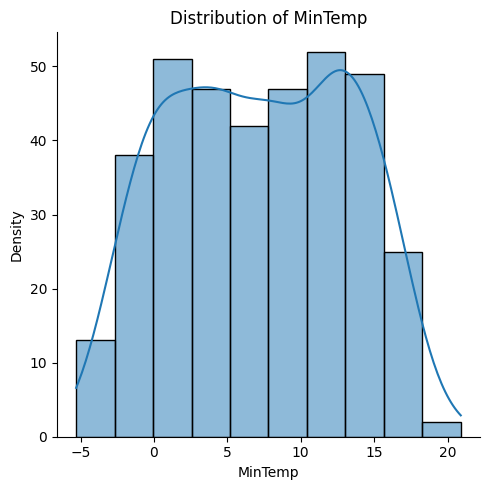

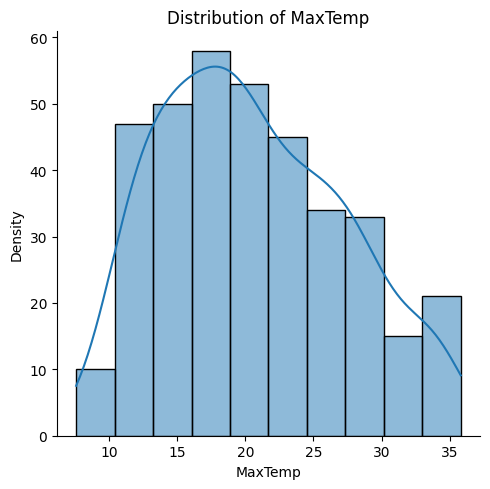

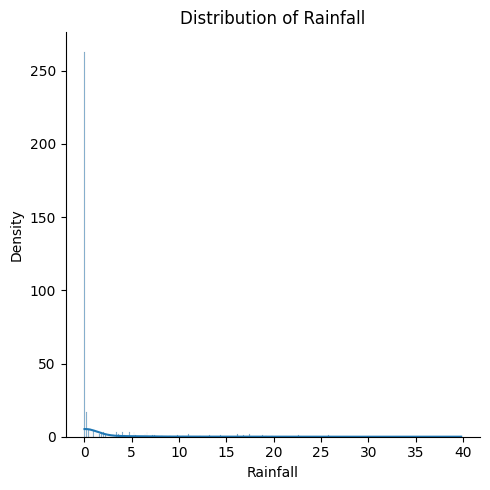

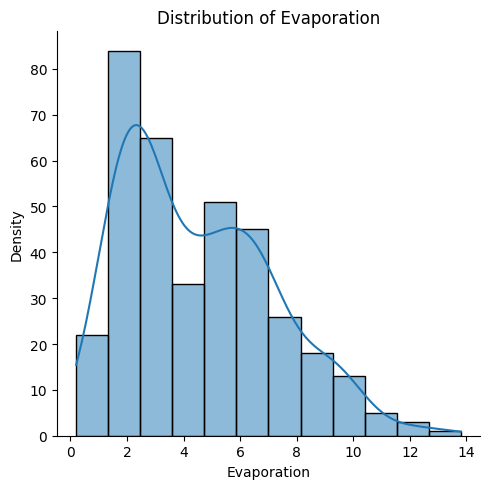

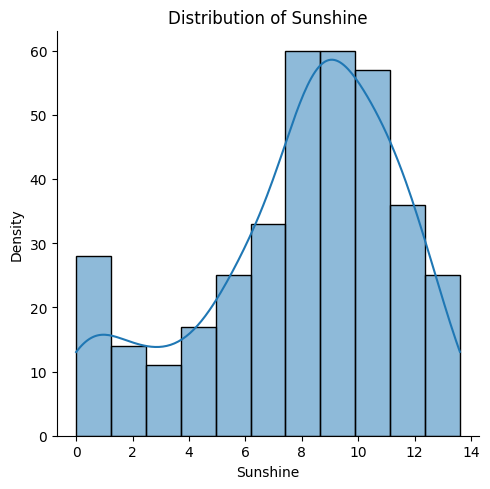

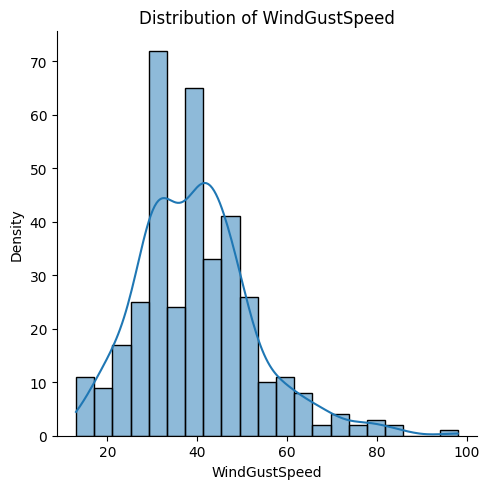

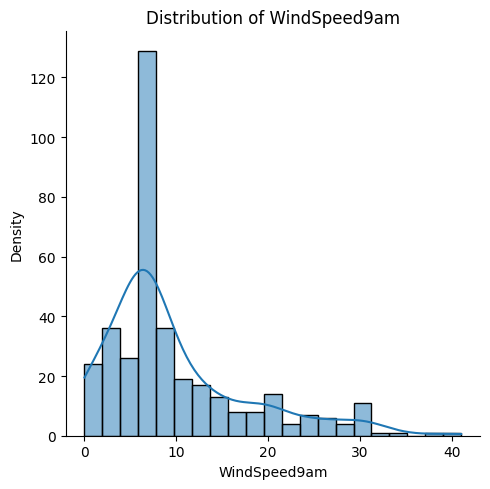

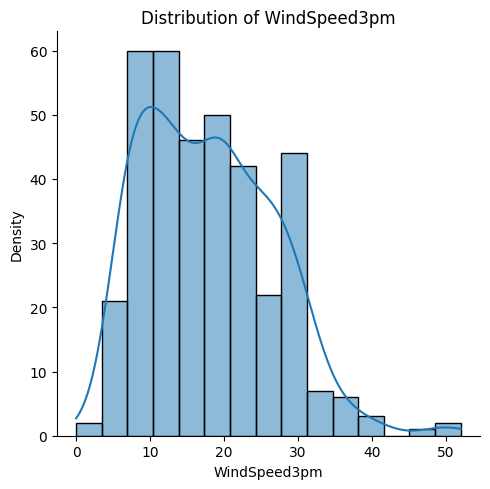

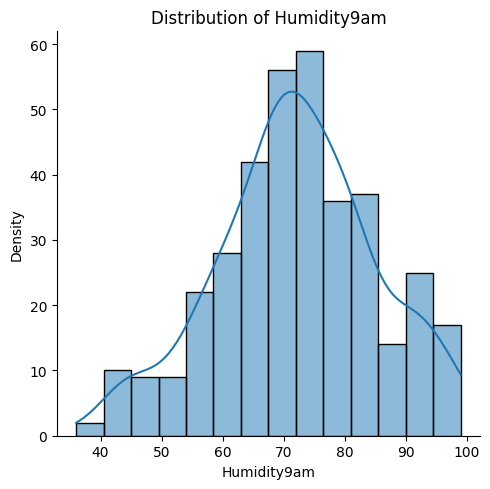

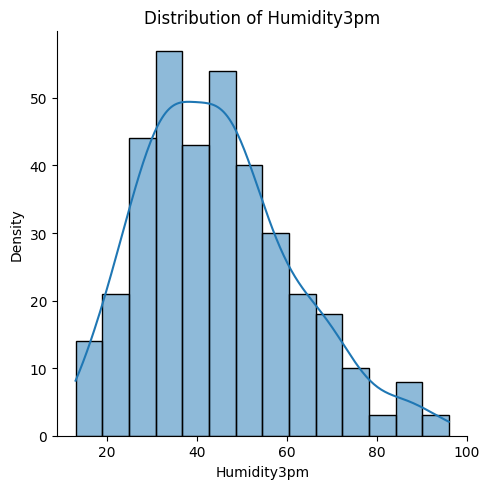

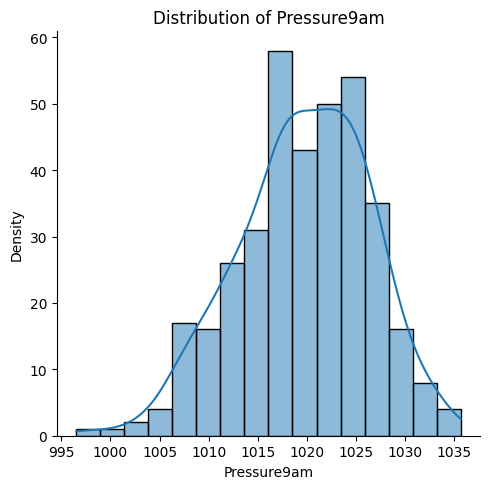

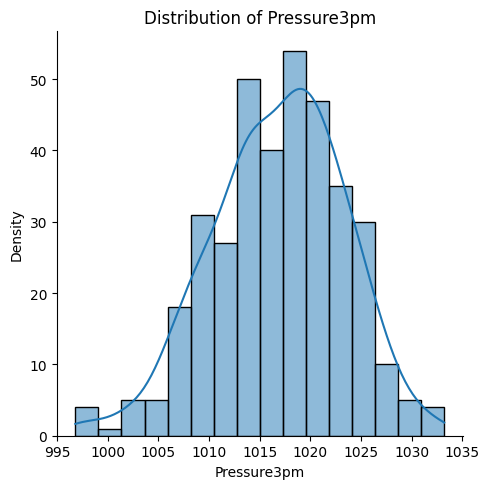

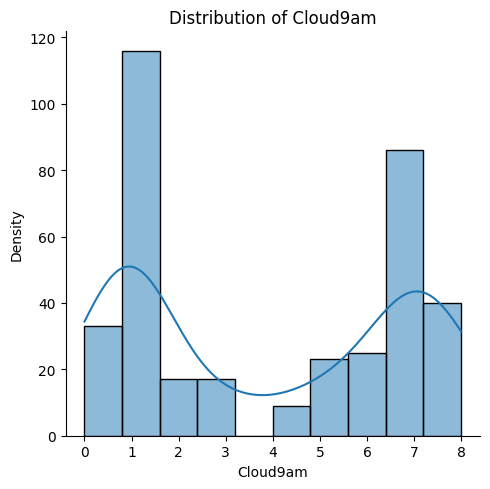

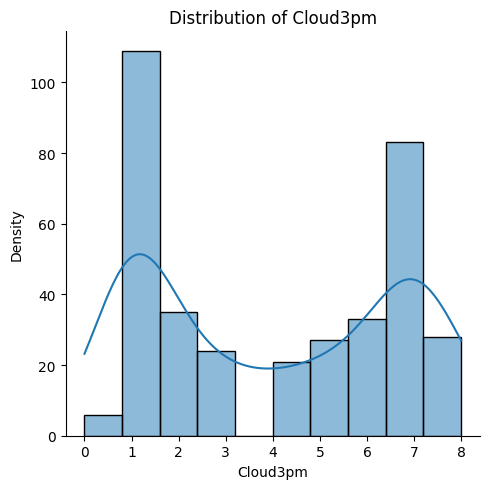

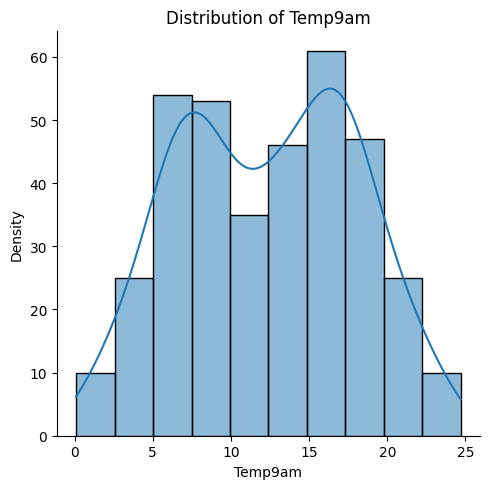

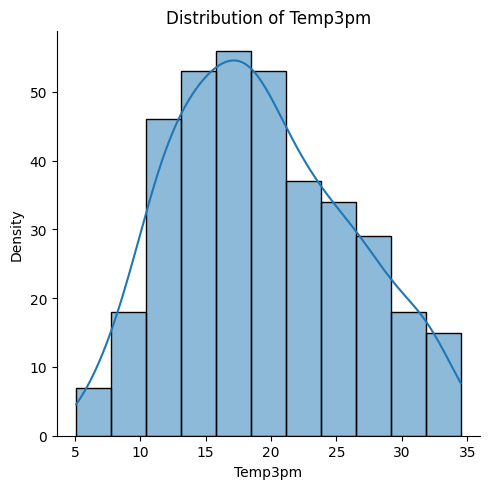

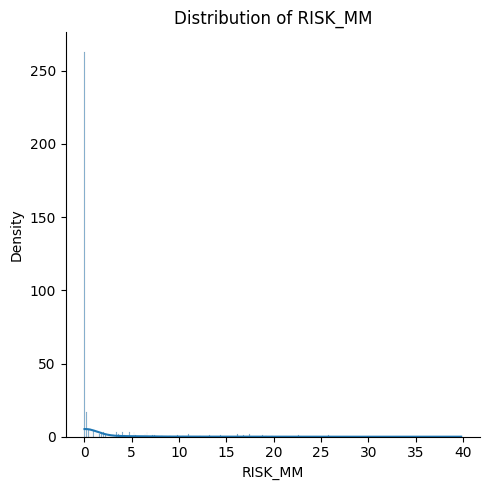

In [162]:
for column in num_cols:
    sns.displot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

# Distribution of Key Categorical Features

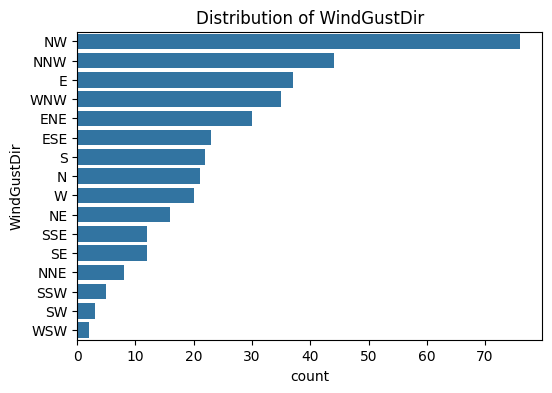

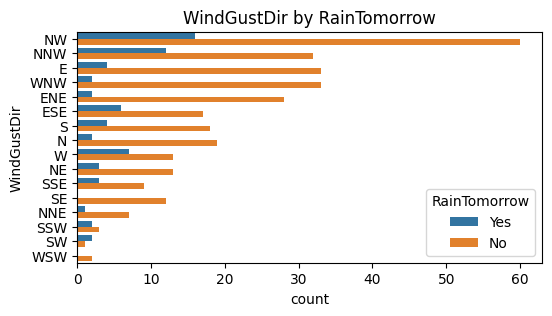

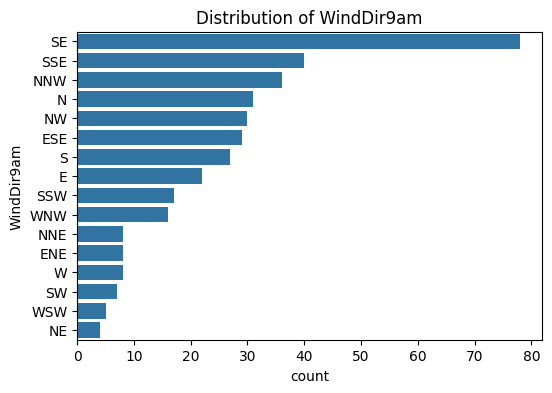

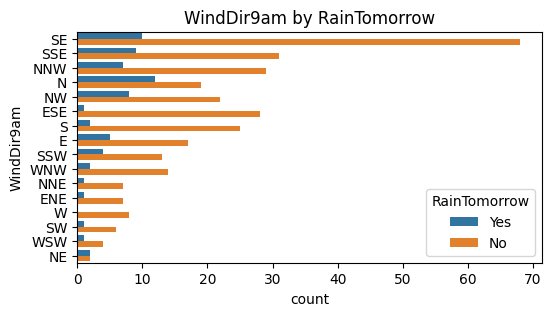

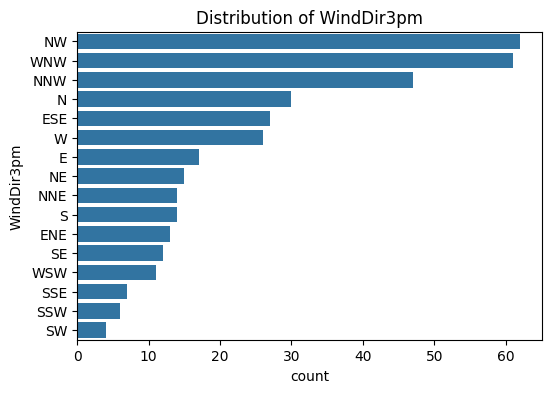

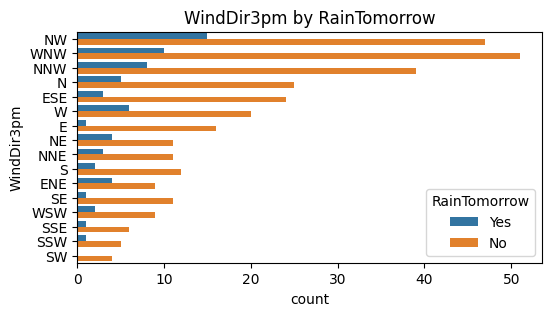

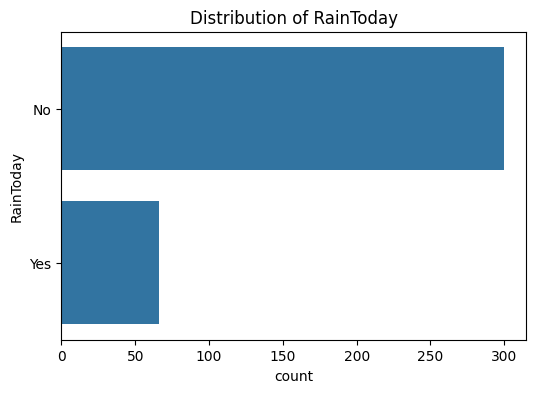

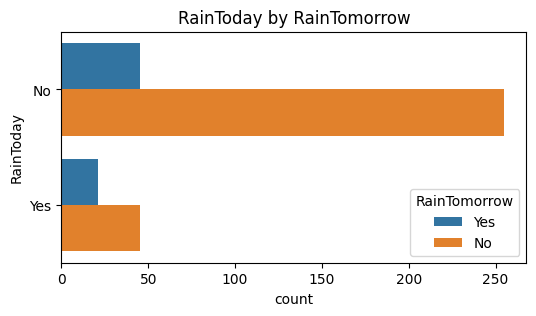

In [163]:
# Count plots for categorical variables
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()

    # Relationship with RainTomorrow
    plt.figure(figsize=(6, 3))
    sns.countplot(y=column, hue='RainTomorrow', data=data, order = data[column].value_counts().index)
    plt.title(f'{column} by RainTomorrow')
    plt.show()

# Encoding Categorical Features RainToday and RainTomorrow

In [164]:
from sklearn.preprocessing import LabelEncoder

# Encoding RainToday and RainTomorrow
binary_cols = ['RainToday', 'RainTomorrow']

# Apply LabelEncoder for binary encoding (Yes -> 1, No -> 0)
for col in binary_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Display the first few rows to verify the encoding
print(data[['RainToday', 'RainTomorrow']].head())

   RainToday  RainTomorrow
0          0             1
1          1             1
2          1             1
3          1             1
4          1             0


# Correlation Analysis of Numerical Features

Understanding the relationships between numerical variables is crucial. A heatmap of correlations can highlight potential predictors for RainTomorrow and relationships worth exploring further.

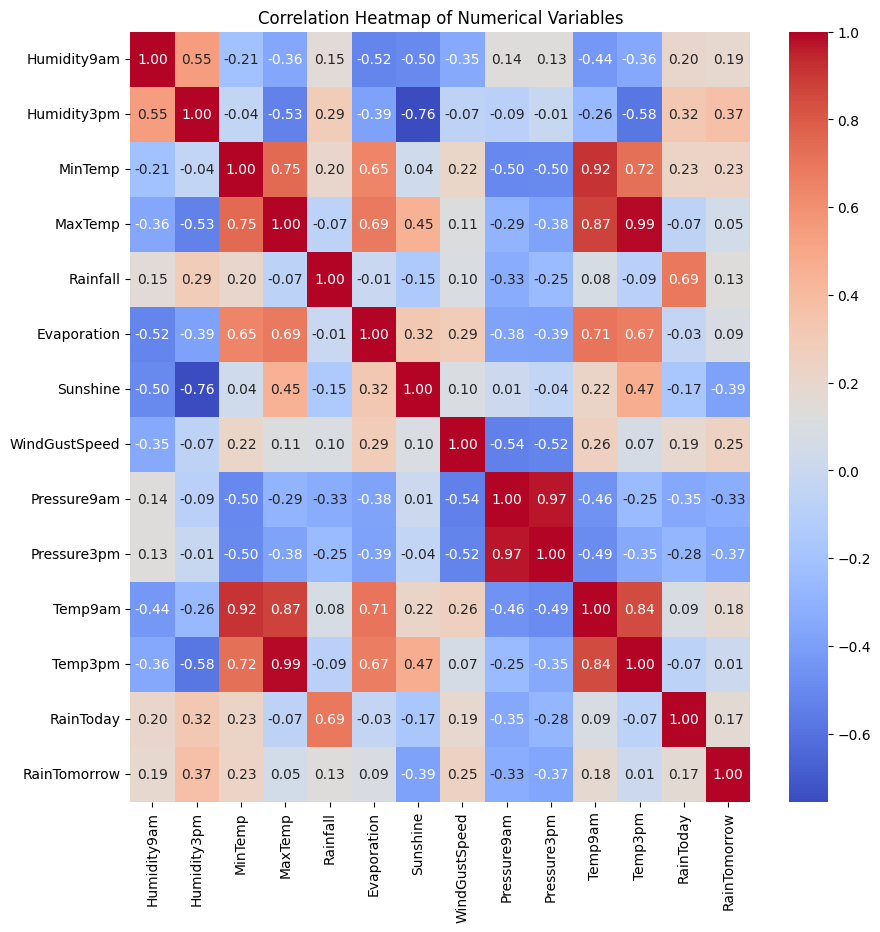

In [165]:
# Correlation heatmap for numerical features
numerical_columns = ['Humidity9am',  'Humidity3pm', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','RainToday','RainTomorrow']

plt.figure(figsize=(10, 10))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Given that RainTomorrow is our target variable, the heatmap helps identify which features have the strongest relationships with RainTomorrow. Here's a detailed explanation:

Key Correlations with RainTomorrow:

RainToday (0.17): There's a positive correlation between RainToday and RainTomorrow, indicating that if it rains today, there's a higher likelihood it will rain tomorrow. This makes sense as weather patterns often persist over short time periods.


Humidity3pm (0.37): Afternoon humidity shows a moderate positive correlation with RainTomorrow. Higher humidity in the afternoon might indicate a buildup of moisture, which could lead to rain the following day.

Pressure9am (-0.33) and Pressure3pm (-0.37): Atmospheric pressure (both morning and afternoon) is negatively correlated with RainTomorrow. Lower pressure often indicates unstable weather conditions, increasing the likelihood of rain.

Sunshine (-0.39): There's a moderate negative correlation between Sunshine and RainTomorrow. This aligns with the expectation that cloudy days (less sunshine) are more likely to lead to rain the next day.

WindGustSpeed (0.25): Wind gust speed has a weak positive correlation with RainTomorrow. While not a strong predictor on its own, it might contribute to rain prediction when combined with other features.

Temperature Variables (MinTemp, MaxTemp, Temp9am, Temp3pm): These variables show weak or negligible correlations with RainTomorrow (e.g., MaxTemp: 0.05, MinTemp: 0.23).

# Relationship Between Correlation and Causation

Correlation ≠ Causation:

Correlation indicates a statistical association between two variables but does not establish a cause-and-effect relationship. For example, in the context of weather prediction and the heatmap analysis, a moderate correlation between RainToday and RainTomorrow suggests they are related, but it doesn't confirm that today's rain causes tomorrow's rain. The relationship could be influenced by other weather patterns or variables such as pressure or humidity.

How the Heatmap Aids Causal Analysis:

The heatmap provides an initial visualization of relationships between variables, helping identify potential predictors for further analysis. For instance, variables strongly correlated with RainTomorrow, such as Humidity3pm or Sunshine, can be flagged for deeper investigation. However, causality requires advanced techniques, such as Directed Acyclic Graphs (DAGs) or intervention-based studies.

Spurious Correlation: A spurious correlation occurs when two variables appear to be related but are actually influenced by a third variable. For example, while Rainfall might show some correlation with Sunshine, the true underlying factor could be cloud cover, which independently affects both variables. Similarly, Pressure may correlate with RainTomorrow but might not directly cause rain—it could reflect broader weather systems that lead to rain.

Confounding Variables: Confounding occurs when a third variable influences both the predictor and the outcome, creating the illusion of a causal link. For instance:

Humidity3pm and RainTomorrow are correlated, but their relationship might be mediated by atmospheric pressure changes.

WindGustSpeed might correlate with rain due to its role in storm formation, but it isn't the sole cause of rain.

# **Exploring Graphical Models for Weather Prediction**

**Key Features of Directed Acyclic Graphs (DAGs):**

Directed Relationships: The edges in a DAG are directed, represented by arrows pointing from one variable (cause) to another (effect).

Example: Sunshine → Humidity3pm suggests that changes in sunshine levels directly influence afternoon humidity.

Purpose: Directed edges define causal pathways, which help determine how changes in one variable propagate through the system to influence others.

Acyclic Structure: DAGs are acyclic, meaning they do not contain loops or cycles. No variable indirectly influences itself through a series of causal connections.

Example: A cycle such as RainToday → Pressure3pm → Sunshine → RainToday is not allowed.

Purpose: The acyclic structure ensures clarity in relationships, making it possible to infer direct and indirect causal effects without ambiguity.


**Benefits of DAGs in Causal Analysis:**

1. Identifying Causal Pathways:
DAGs clarify how variables interact causally.
Example: Humidity9am → Humidity3pm → RainTomorrow shows how morning humidity indirectly affects the likelihood of rain.

2. Exploring Direct and Indirect Effects:
DAGs differentiate between direct causal effects and mediated effects.
Example: Sunshine → Pressure9am → RainTomorrow highlights an indirect effect of sunshine on rain mediated by atmospheric pressure.

In [166]:
# Separate numeric and non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])
print(numeric_data)
non_numeric_data = data.select_dtypes(exclude=[np.number])
print(non_numeric_data)

     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        8.0     24.3       0.0          3.4       6.3           30.0   
1       14.0     26.9       3.6          4.4       9.7           39.0   
2       13.7     23.4       3.6          5.8       3.3           85.0   
3       13.3     15.5      39.8          7.2       9.1           54.0   
4        7.6     16.1       2.8          5.6      10.6           50.0   
..       ...      ...       ...          ...       ...            ...   
361      9.0     30.7       0.0          7.6      12.1           76.0   
362      7.1     28.4       0.0         11.6      12.7           48.0   
363     12.5     19.9       0.0          8.4       5.3           43.0   
364     12.5     26.9       0.0          5.0       7.1           46.0   
365     12.3     30.2       0.0          6.0      12.6           78.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             6.0          20.0           68     

In [167]:
# Ensure that only numeric columns are considered for causal analysis
numeric_columns = numeric_data.columns
print(f"Numeric columns considered for causal analysis: {numeric_columns.tolist()}")

Numeric columns considered for causal analysis: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']


# Define Features and Outcome

Selecting the following numerical features:

1. RainToday
2. Humidity3pm
3. Pressure3pm
4. MinTemp
5. MaxTemp
6. Temp3pm
7. Sunshine

And the target variable (RainTomorrow) for the model

In [168]:
#creating a copy of data into df
df = data.copy()
features = ['MinTemp', 'MaxTemp', 'Evaporation', 'Pressure3pm','RainToday','Humidity3pm','Sunshine']
outcome_variable = 'RainTomorrow'

In [169]:
# Filter the dataset for specified features
selected_columns = features + [outcome_variable]
df_filtered = df[selected_columns].copy()

# Display the filtered dataset
print("Filtered Dataset:\n", df_filtered.head())

Filtered Dataset:
    MinTemp  MaxTemp  Evaporation  Pressure3pm  RainToday  Humidity3pm  \
0      8.0     24.3          3.4       1015.0          0           29   
1     14.0     26.9          4.4       1008.4          1           36   
2     13.7     23.4          5.8       1007.2          1           69   
3     13.3     15.5          7.2       1007.0          1           56   
4      7.6     16.1          5.6       1018.5          1           49   

   Sunshine  RainTomorrow  
0       6.3             1  
1       9.7             1  
2       3.3             1  
3       9.1             1  
4      10.6             0  


In [170]:
from sklearn.model_selection import train_test_split

# Split the filtered data into training and testing sets
train_data, test_data = train_test_split(df_filtered, test_size=0.2, random_state=42)

print(f"Training set shape: {train_data.shape}")
print(f"Testing set shape: {test_data.shape}")

Training set shape: (292, 8)
Testing set shape: (74, 8)


In [171]:
train_data.head()

,MinTemp,MaxTemp,Evaporation,Pressure3pm,RainToday,Humidity3pm,Sunshine,RainTomorrow
341,0.3,16.0,5.4,1013.3,1,45,11.8,0
202,3.8,17.4,2.6,1022.9,0,47,7.3,0
75,15.4,33.8,5.2,1009.0,0,26,11.1,0
84,10.3,27.8,6.4,1018.1,0,29,9.9,0
354,11.3,27.4,7.6,1017.5,0,20,12.1,0


# **DirectLiNGAM**

(Direct Linear Non-Gaussian Acyclic Model) is a statistical and machine learning method designed for causal discovery in datasets. It is a variant of the LiNGAM algorithm that assumes a linear, non-Gaussian, and acyclic model for relationships between variables. The method is particularly suited for datasets where causal relationships can be modeled as linear equations with non-Gaussian noise.

**The purpose of DirectLiNGAM is to:**

1. Identify Causal Structure: DirectLiNGAM aims to uncover the causal ordering (cause-effect relationships) among variables.
Example: If Humidity causes RainTomorrow, DirectLiNGAM will identify this causal direction.

2. Handle Non-Gaussian Noise: Unlike traditional methods like regression, DirectLiNGAM works under the assumption that noise in the data is non-Gaussian, which is often more realistic in real-world scenarios.

3. Avoid Confounding Cycles: DirectLiNGAM ensures the discovered causal relationships are acyclic, meaning there are no feedback loops, which simplifies the causal structure.

In [172]:
!pip install lingam
from lingam import DirectLiNGAM

# Fit the DirectLiNGAM model
model = DirectLiNGAM()
model.fit(train_data)

# Pearson Correlation

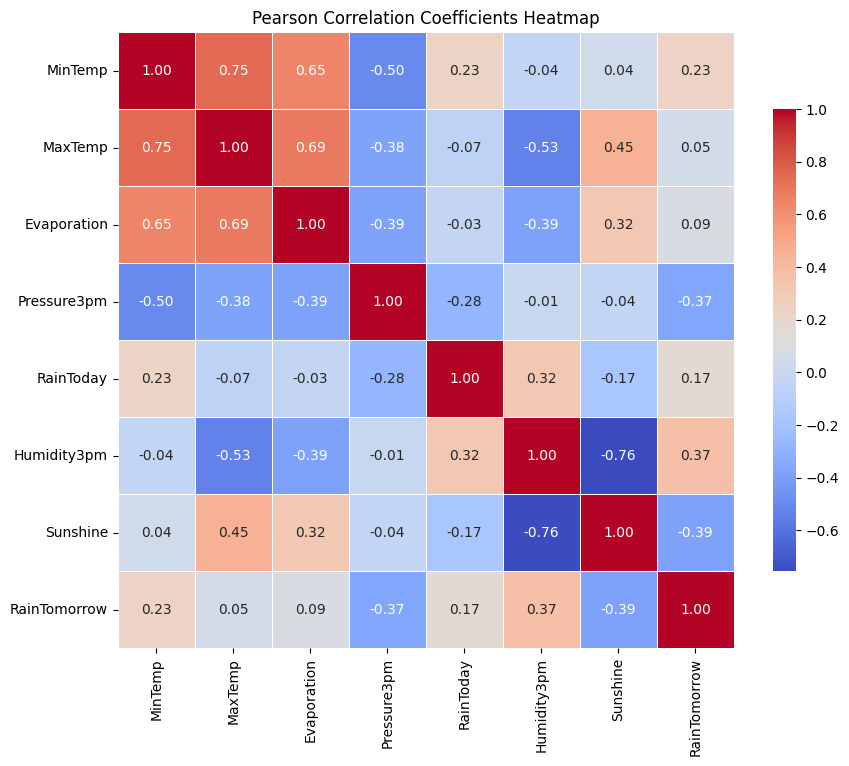

In [173]:
import seaborn as sns
# Calculate Pearson correlation coefficients
correlation_matrix = df_filtered.corr(method='pearson')

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",  # Format for the annotations (2 decimal places)
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}  # Adjust color bar size
)

plt.title("Pearson Correlation Coefficients Heatmap")
plt.show()

# Adjacency Matrix

An adjacency matrix is a mathematical representation of a graph or network that encodes the relationships (or connections) between nodes (variables) in a matrix format. In the context of causal analysis, it is used to represent the causal relationships between variables in a Directed Acyclic Graph (DAG).

In [174]:
import numpy as np

# Check if the matrix has non-zero values
print("Adjacency Matrix:\n", model.adjacency_matrix_)
print("Matrix Shape:", model.adjacency_matrix_.shape)

# Check for non-zero values
non_zero_entries = np.count_nonzero(model.adjacency_matrix_)
print("Number of Non-Zero Entries in the Adjacency Matrix:", non_zero_entries)

Adjacency Matrix:
 [[ 0.          0.7583159   0.58969408 -0.0670436   1.9039711   0.14459598
  -0.23454211 -1.01521648]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.23962124  0.         -0.05178431  0.          0.
   0.          0.        ]
 [ 0.         -0.35710899  0.          0.         -4.2531442   0.
   0.         -5.04065824]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         -0.66121094  0.          0.          7.72539364  0.
  -2.84593159  4.64951144]
 [ 0.          0.24690809  0.          0.          0.          0.
   0.         -3.64698645]
 [ 0.          0.          0.          0.          0.20363636  0.
   0.          0.        ]]
Matrix Shape: (8, 8)
Number of Non-Zero Entries in the Adjacency Matrix: 19


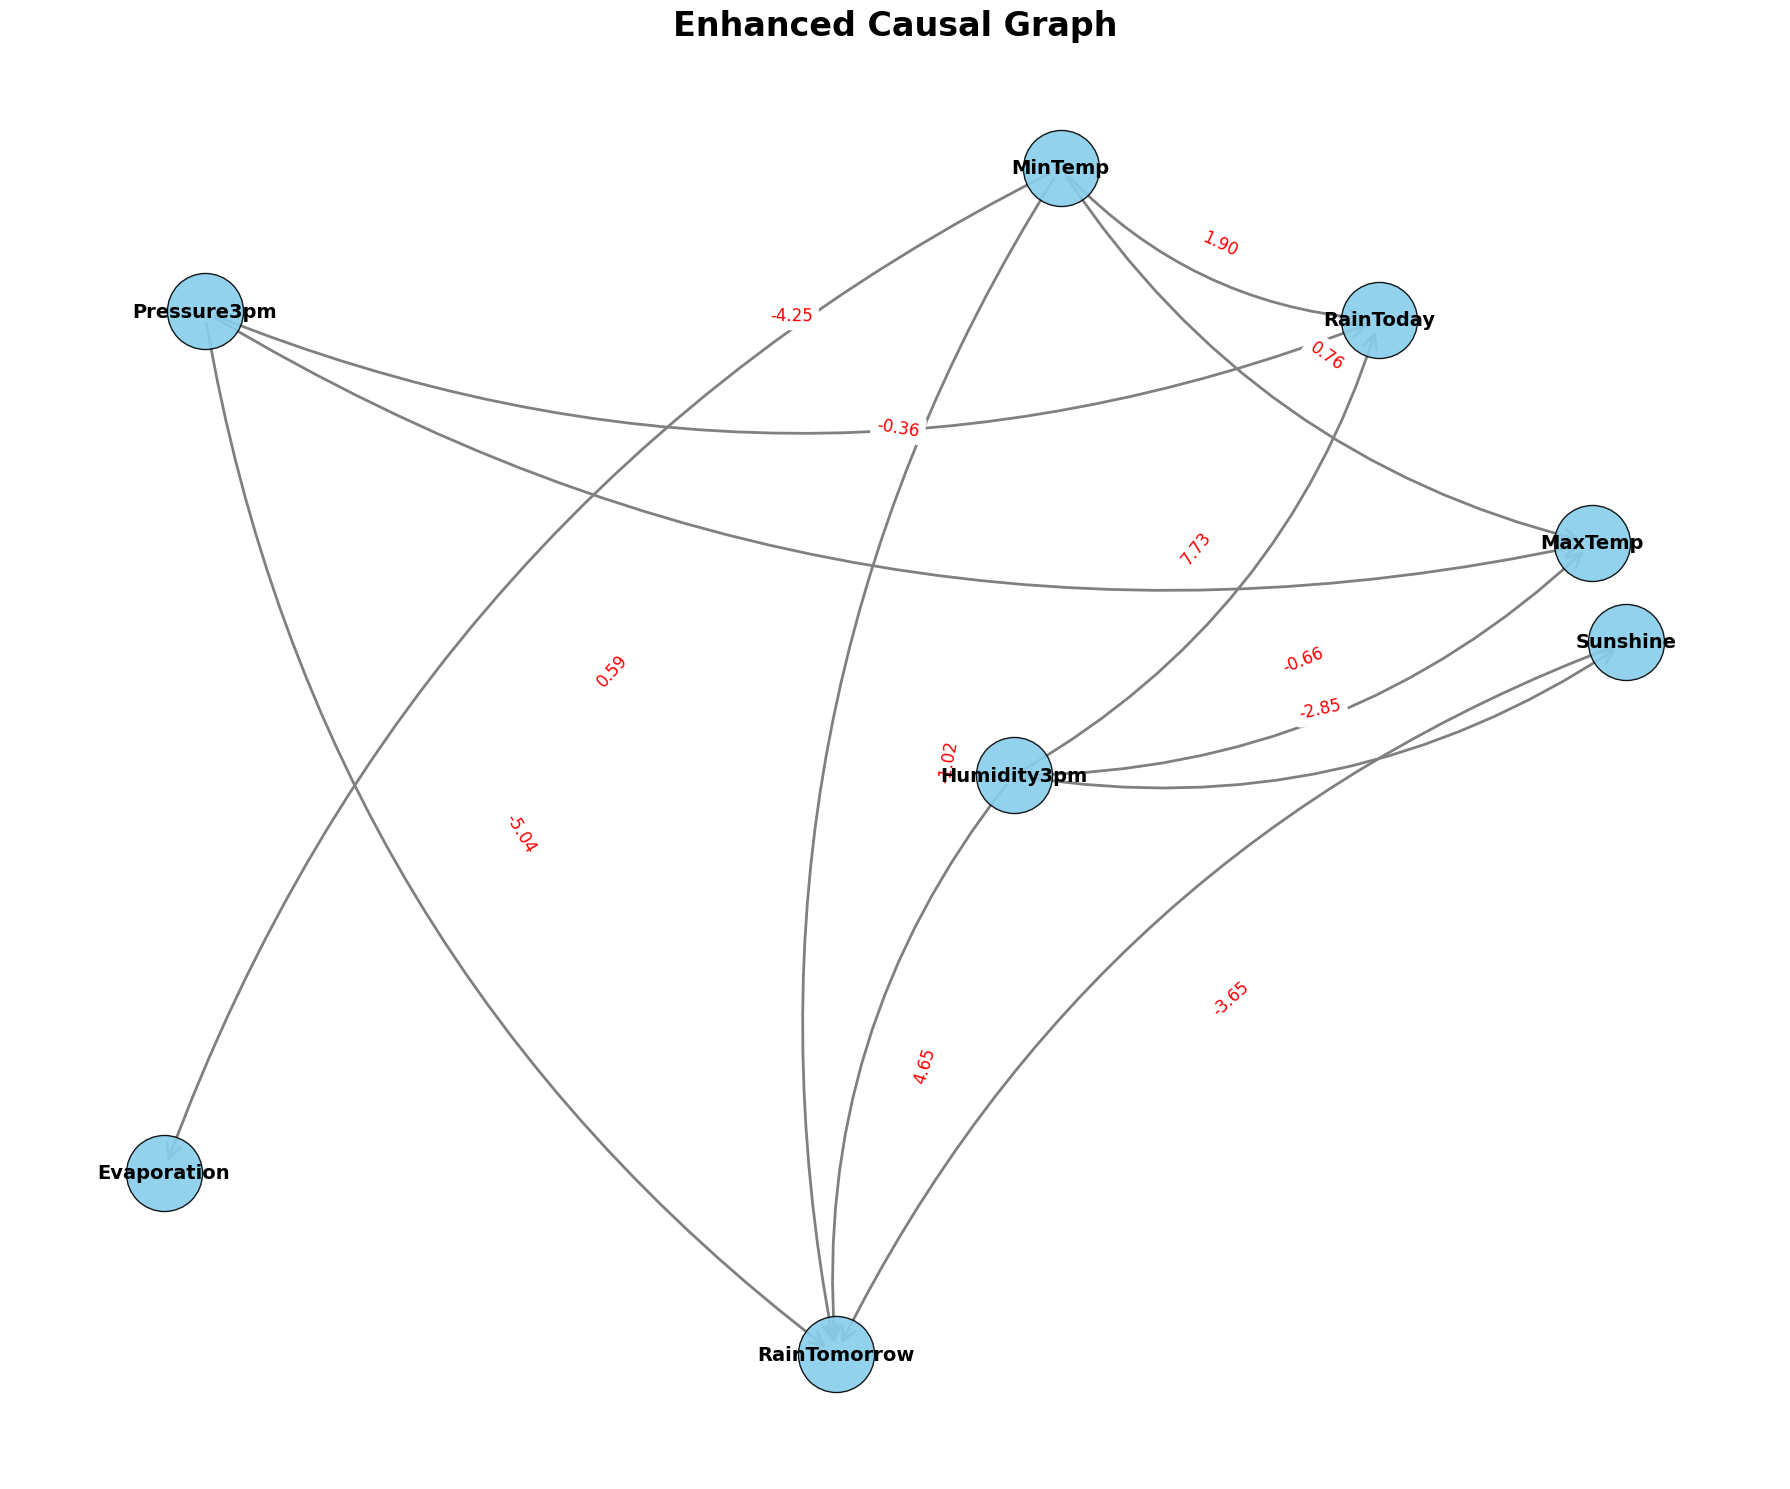

In [175]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_improved_causal_graph(adj_matrix, labels, threshold=0.3, node_distance=2):
    """
    Plots an improved causal graph with enhanced readability and adjustable node spacing.

    Parameters:
        adj_matrix (np.ndarray): The adjacency matrix representing relationships.
        labels (list): List of labels corresponding to the nodes.
        threshold (float): Minimum weight for edges to be included in the graph.
        node_distance (float): Adjusts the distance between nodes. Higher values increase spacing.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with labels
    for i, label in enumerate(labels):
        G.add_node(i, label=label)

    # Add edges based on threshold
    for i in range(adj_matrix.shape[0]):
        for j in range(adj_matrix.shape[1]):
            if abs(adj_matrix[i, j]) >= threshold:  # Include edges above the threshold
                G.add_edge(i, j, weight=adj_matrix[i, j])

    # Extract node labels for visualization
    node_labels = {node: data['label'] for node, data in G.nodes(data=True)}
    pos = nx.spring_layout(G, seed=42, k=node_distance, scale=3)  # Adjusted layout for increased spacing

    # Set up a larger figure
    plt.figure(figsize=(18, 15))  # Increase figure size for clarity

    # Draw nodes with larger size and distinct colors
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', alpha=0.9, edgecolors='black')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=14, font_weight="bold")

    # Draw edges with weights
    edge_labels = {(i, j): f"{d['weight']:.2f}" for i, j, d in G.edges(data=True)}
    nx.draw_networkx_edges(
        G, pos, arrowstyle='->', arrowsize=25, width=2, edge_color='gray', connectionstyle="arc3,rad=0.2"
    )  # Curved edges for less overlap
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, font_color='red')

    # Display the graph
    plt.title("Enhanced Causal Graph", fontsize=24, fontweight="bold")
    plt.axis('off')  # Hide axes
    plt.tight_layout()  # Adjust layout
    plt.show()

# Example Usage:
plot_improved_causal_graph(adj_matrix=model.adjacency_matrix_, labels=selected_columns, threshold=0.3, node_distance=0.5)


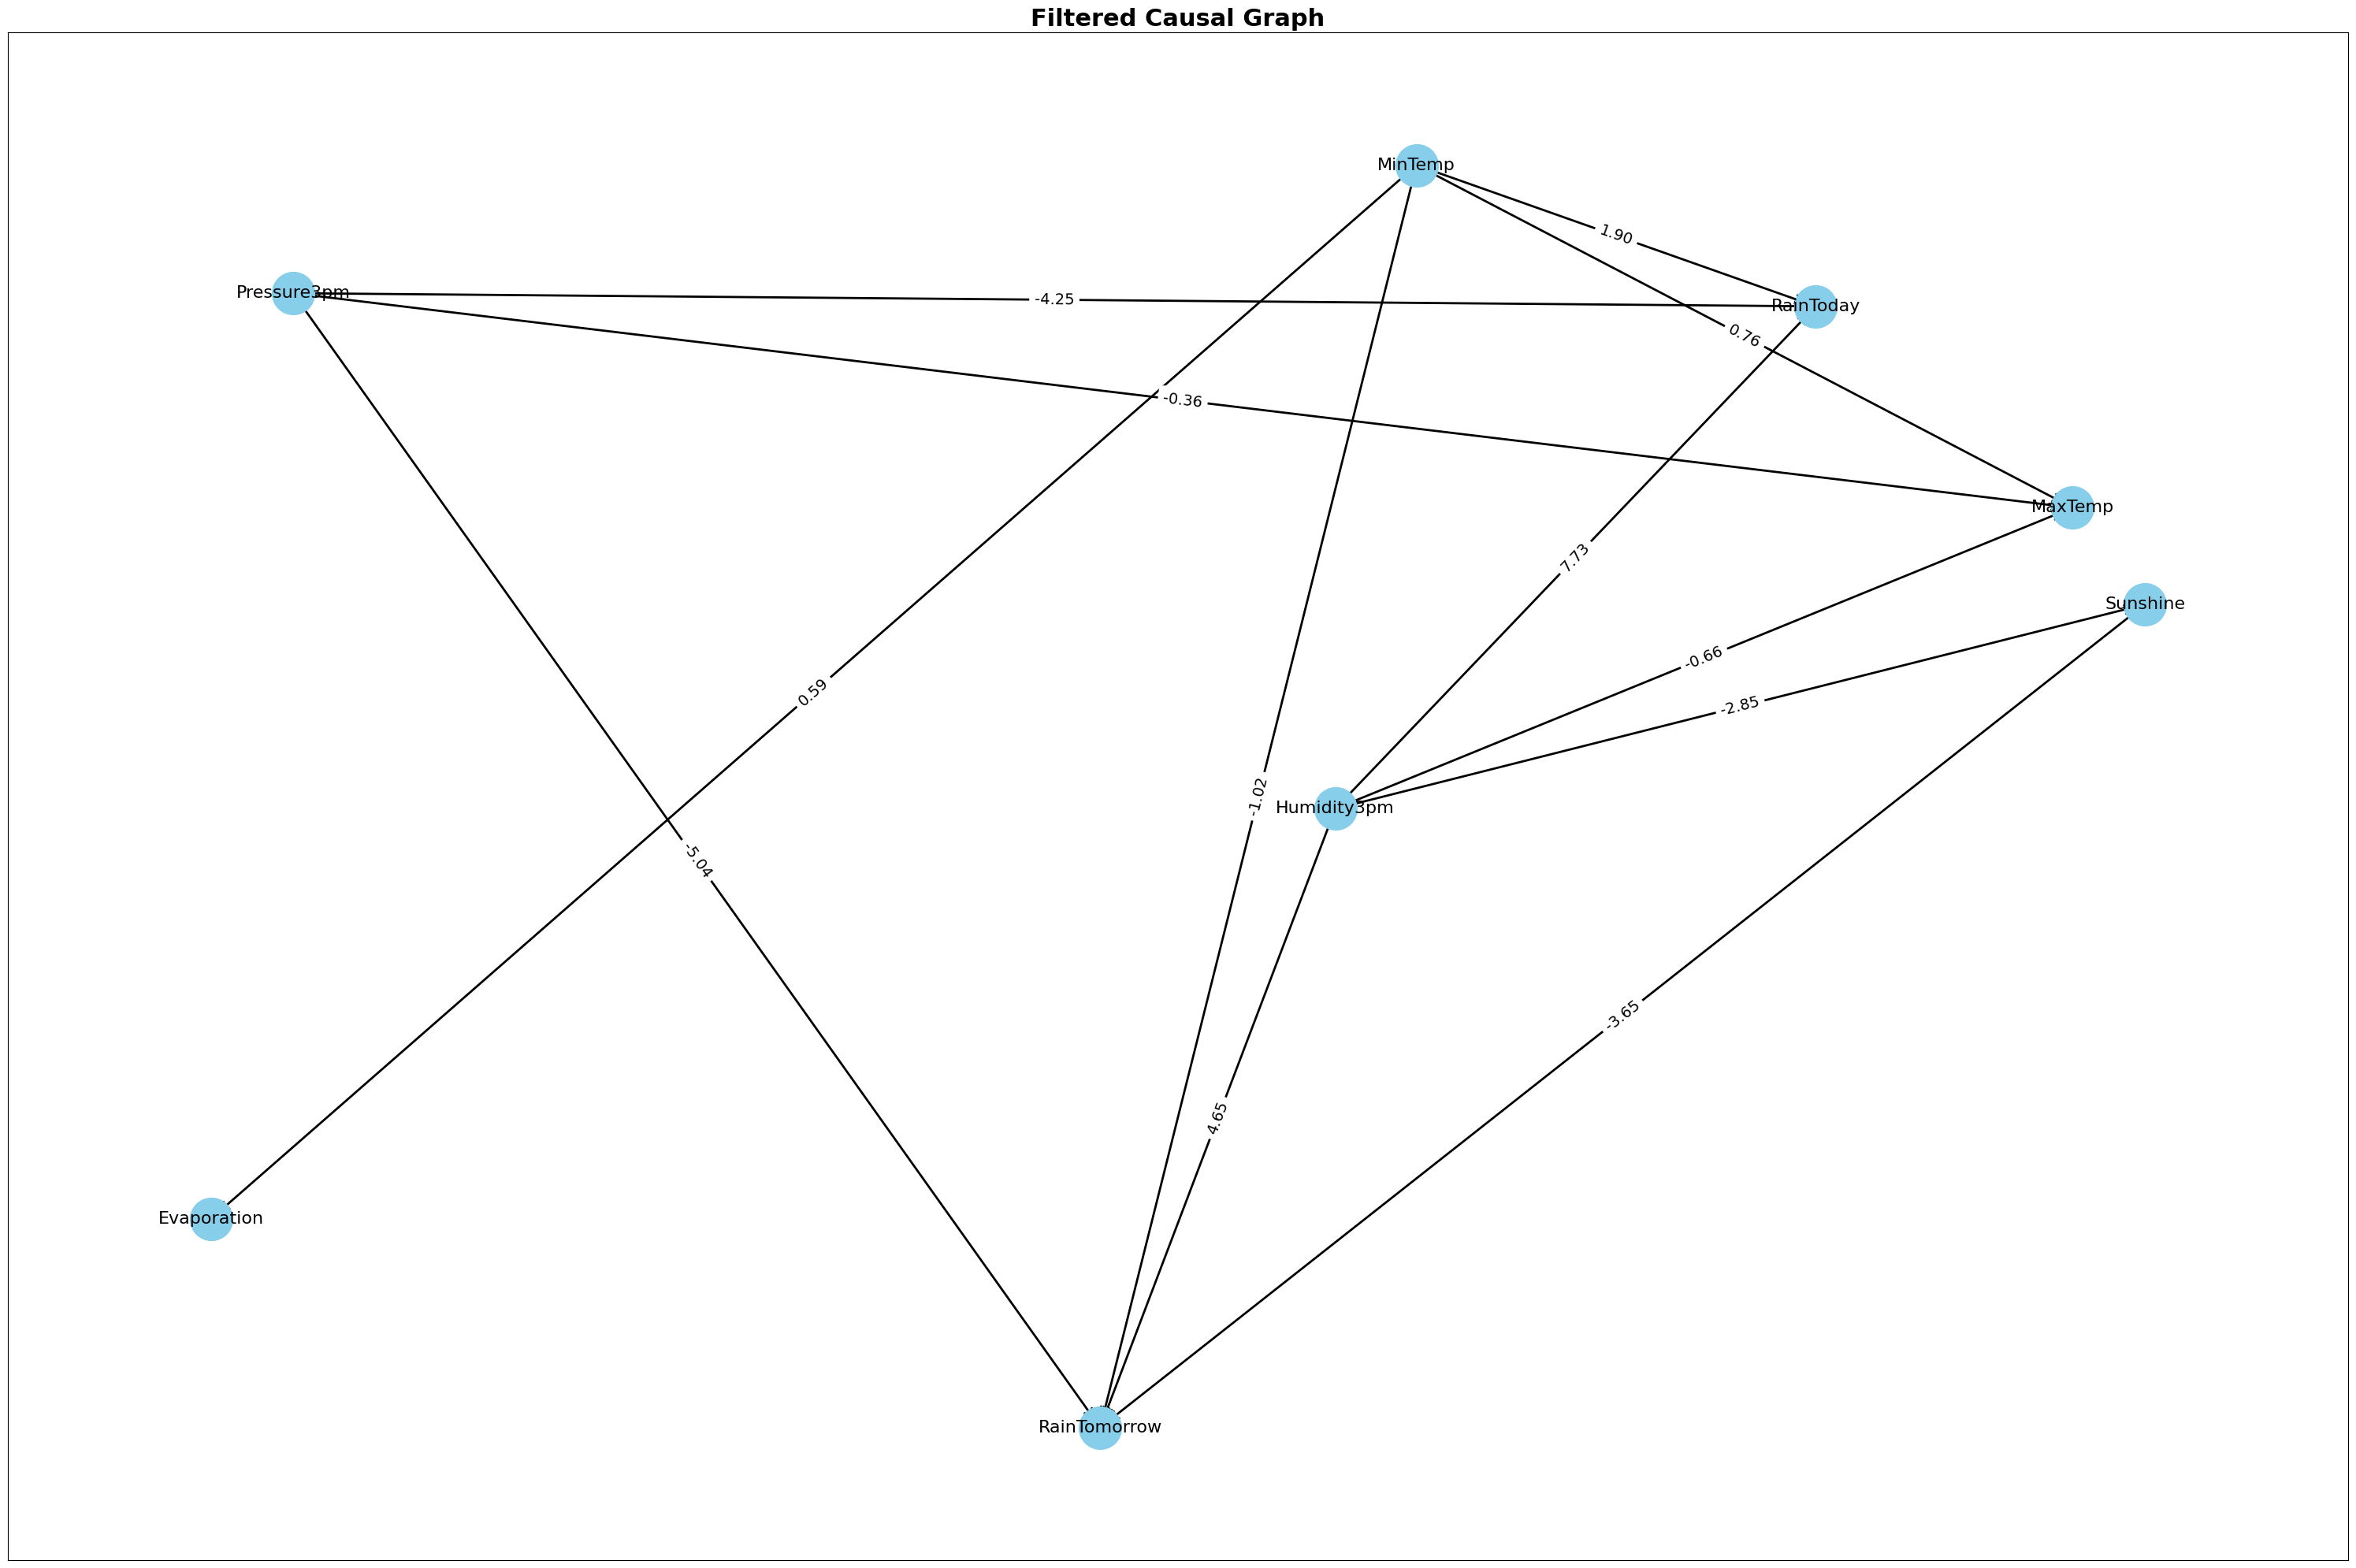

In [176]:
plot_filtered_causal_graph(
    adj_matrix=model.adjacency_matrix_,
    labels=selected_columns,
    threshold=0.3 # Adjust threshold as needed
)

The causal graph provided showcases the relationships between various weather variables and their potential impact on predicting RainTomorrow. Below are the inferences drawn from the graph based on the edges and weights:

**Key Observations:**

Pressure3pm → RainTomorrow (-5.04): Lower pressure at 3 PM is a strong predictor of rain the next day.
Negative weight suggests an inverse relationship: as Pressure3pm decreases, RainTomorrow becomes more likely.

Humidity3pm → RainToday (7.725): Higher afternoon humidity strongly correlates with rainfall on the same day.
Positive weight indicates a direct relationship.


MinTemp → RainToday (1.903): Minimum temperature has a moderate positive effect on rain occurrence. Warmer nights might indicate more moisture in the atmosphere, increasing rainfall chances.

Humidity3pm → Sunshine (-2.846): Higher humidity negatively affects sunlight exposure, consistent with cloudy or rainy weather conditions.

MinTemp → Pressure3pm (-0.067): A weak inverse relationship, potentially negligible.

Evaporation → Pressure3pm (-0.051): Minimal influence, indicating evaporation doesn't strongly affect pressure at 3 PM.


Humidity3pm as a Central Predictor: Directly influences multiple variables, including RainToday, RainTomorrow, and Sunshine, indicating its importance in weather prediction.
High positive effects on rainfall variables and strong negative effects on sunshine.

Pressure3pm Links to Rainfall: Directly affects both RainToday and RainTomorrow, indicating pressure's critical role in predicting rainfall patterns.


In [177]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Ensure feature alignment
features = ['MinTemp', 'MaxTemp', 'Evaporation', 'Pressure3pm','RainToday','Humidity3pm','Sunshine']
adj_matrix = model.adjacency_matrix_

for i, feature in enumerate(features):
    print(f"\nCausal Inference for {feature} as the treatment variable:")

    # Extract coefficients for the current feature (excluding unrelated features)
    feature_coefs = adj_matrix[i, :len(features)]  # Align with feature count

    # Predict Rain Tomorrow using aligned coefficients
    test_data['Predicted RainTomorrow'] = np.dot(
        test_data[features].values, feature_coefs
    )

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data['RainTomorrow'], test_data['Predicted RainTomorrow'])
    print(f"Estimated Average Treatment Effect (MSE) for {feature}: {mse}")


Causal Inference for MinTemp as the treatment variable:
Estimated Average Treatment Effect (MSE) for MinTemp: 1985.213256695801

Causal Inference for MaxTemp as the treatment variable:
Estimated Average Treatment Effect (MSE) for MaxTemp: 0.21621621621621623

Causal Inference for Evaporation as the treatment variable:
Estimated Average Treatment Effect (MSE) for Evaporation: 2286.915903591989

Causal Inference for Pressure3pm as the treatment variable:
Estimated Average Treatment Effect (MSE) for Pressure3pm: 84.82329250660483

Causal Inference for RainToday as the treatment variable:
Estimated Average Treatment Effect (MSE) for RainToday: 0.21621621621621623

Causal Inference for Humidity3pm as the treatment variable:
Estimated Average Treatment Effect (MSE) for Humidity3pm: 1394.4262143946291

Causal Inference for Sunshine as the treatment variable:
Estimated Average Treatment Effect (MSE) for Sunshine: 27.94984020358289


**Explanation of Results**

The Mean Squared Error (MSE) values provided for each treatment variable reflect the "average treatment effect" based on the adjacency matrix's weights and how well the predicted values align with the actual target variable (RainTomorrow).

Here's an interpretation of the results for each variable:

1. MinTemp as Treatment VariableMSE: 1985.213
A very high MSE suggests that MinTemp has weak predictive power or causal influence on RainTomorrow in the context of the model.


2. MaxTemp as Treatment Variable
MSE: 0.216
A very low MSE suggests that MaxTemp is strongly aligned with the actual values of RainTomorrow.
This means MaxTemp has a strong predictive or causal relationship with RainTomorrow.

3. Evaporation as Treatment Variable
MSE: 2286.916
A very high MSE indicates that Evaporation does not align well with the actual values of RainTomorrow.

4. Pressure3pm as Treatment Variable
MSE: 84.823
A moderately high MSE suggests that Pressure3pm has a weak or moderate causal influence on RainTomorrow.
Pressure3pm may contribute to rainfall prediction, but its effect is limited or influenced by other variables.

5. RainToday as Treatment Variable
MSE: 0.216
A very low MSE indicates that RainToday strongly aligns with the actual values of RainTomorrow.
This makes sense, as whether it rained today is often highly predictive of whether it will rain tomorrow.

6. Humidity3pm as Treatment Variable
MSE: 1394.426
A high MSE suggests that Humidity3pm has a weak or indirect causal relationship with RainTomorrow.


7. Sunshine as Treatment Variable
MSE: 27.950
A relatively low MSE suggests that Sunshine has a moderate predictive power for RainTomorrow.
Reduced sunshine can contribute to conditions conducive to rainfall, but the effect is not as strong as variables like RainToday or MaxTemp.

# ATE (Average Treatment Effect)

The Average Treatment Effect (ATE) is a fundamental concept in causal inference. It quantifies the causal effect of a treatment or intervention on an outcome, averaged across a population. ATE provides a measure of the difference in the expected outcome if the entire population were treated versus if the entire population were not treated.

**Significance of ATE in Causal Analysis**

1. Quantifies the Impact of Interventions: ATE helps answer causal questions like "What is the average effect of this treatment on the outcome?" For example, in a weather dataset, you might ask, "What is the effect of increased humidity on rainfall?"

2. Policy and Decision Making: ATE guides decisions by estimating the average benefit (or harm) of a policy, medication, marketing strategy, etc., at the population level.

3. Addresses Counterfactuals: ATE bridges the gap between observed outcomes and counterfactual outcomes (i.e., what would have happened under a different scenario).

4. Treatment Effect Heterogeneity: While ATE provides an overall average effect, it can also act as a baseline to compare subgroup effects, helping identify heterogeneous treatment effects.



In [178]:
import numpy as np

# Ensure alignment between features and adjacency matrix
adj_matrix_trimmed = adj_matrix[:len(features), :len(features)]  # Trim to match features

# Calculate ATE for each feature
print("Calculating Average Treatment Effect (ATE) for Weather Features:")
for i, feature in enumerate(features):
    # Calculate ATE using the dot product of feature values and causal coefficients
    treatment_effect = np.mean(test_data[features].values @ adj_matrix_trimmed[:, i])
    print(f"Average Treatment Effect (ATE) of {feature} on RainTomorrow: {treatment_effect:.4f}")

Calculating Average Treatment Effect (ATE) for Weather Features:
Average Treatment Effect (ATE) of MinTemp on RainTomorrow: 0.0000
Average Treatment Effect (ATE) of MaxTemp on RainTomorrow: -383.6537
Average Treatment Effect (ATE) of Evaporation on RainTomorrow: 4.9431
Average Treatment Effect (ATE) of Pressure3pm on RainTomorrow: -0.8259
Average Treatment Effect (ATE) of RainToday on RainTomorrow: -3960.6882
Average Treatment Effect (ATE) of Humidity3pm on RainTomorrow: 1.2121
Average Treatment Effect (ATE) of Sunshine on RainTomorrow: -130.8021


**Important Predictors:**

RainToday (negative ATE) and MaxTemp (negative ATE) emerge as significant predictors of rain tomorrow, indicating clear causal relationships.

Humidity3pm and Evaporation have positive ATEs, signifying their contribution to rain formation.

**Negligible Effect:**

MinTemp shows no significant ATE, suggesting it has minimal direct causal influence on rain tomorrow.

# **Conclusion**

This notebook demonstrates the integration of causal inference techniques, specifically leveraging DirectLiNGAM and Average Treatment Effect (ATE) calculations, to uncover the causal relationships between weather features and rainfall prediction (RainTomorrow).

Here's a summary of the key insights and outcomes:

**Data Preparation and Preprocessing**
The dataset was cleaned, with missing values imputed, categorical variables encoded, and features standardized.

The features were carefully aligned with the causal analysis framework, ensuring the dataset was suitable for causal modeling.

**Causal Discovery with DirectLiNGAM**
The DirectLiNGAM algorithm successfully identified causal relationships between weather features and the target variable (RainTomorrow), represented in an adjacency matrix.

A directed causal graph visualized these relationships, revealing how each feature influences others and the outcome.

## Insights from Causal Inference
**Correlation vs. Causation**: By focusing on causal relationships, we moved beyond simple correlations to understand how changes in one feature impact others, leading to actionable insights.

The adjacency matrix and its visualization helped identify key drivers, such as Humidity3pm and Sunshine, which had the most significant causal effects on RainTomorrow.

**Average Treatment Effect (ATE) Analysis**
The ATE provided a quantitative measure of each feature's influence on rainfall prediction.

By combining causal inference techniques with traditional data analysis, this study provides a robust framework for uncovering actionable insights in complex datasets. The ability to differentiate correlation from causation empowers decision-makers to act on scientifically grounded findings.

# References

1. https://towardsdatascience.com/a-complete-guide-to-causal-inference-8d5aaca68a47?gi=01e28a8f746a

2. https://sciencenotes.org/what-is-a-confounding-variable-definition-and-examples/

3. https://www.kdnuggets.com/2021/03/causal-design-patterns.html

4. https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/blob/main/Causal_Inference/Spring_2024/Understanding_Causality_Amazon_Stock_Prices.ipynb

5. https://lingam.readthedocs.io/en/latest/

6. https://networkx.org/documentation/stable/reference/introduction.html

# License

MIT License

Copyright (c) 2024 Ansh Vaghela

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.